In [1]:
import setup_notebook_environment
import pyciras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich.pretty import pprint
from utility import config
from IPython.display import display, HTML

In [2]:
base_csv_path = config.DATA_FOLDER / 'v1.0'
git_df = pd.read_csv(base_csv_path / 'git.csv')
lint_df = pd.read_csv(base_csv_path / 'lint.csv')
lint_df['date'] = pd.to_datetime(lint_df['date'])
metadata_df = pd.read_csv(base_csv_path / 'metadata.csv')
metadata_df['createdAt'] = pd.to_datetime(metadata_df['createdAt'])
metadata_df['pushedAt'] = pd.to_datetime(metadata_df['pushedAt'])
metadata_df['updatedAt'] = pd.to_datetime(metadata_df['updatedAt'])
stargazers_df = pd.read_csv(base_csv_path / 'stargazers.csv')
stargazers_df['date'] = pd.to_datetime(stargazers_df['date'])
test_df = pd.read_csv(base_csv_path / 'test.csv')

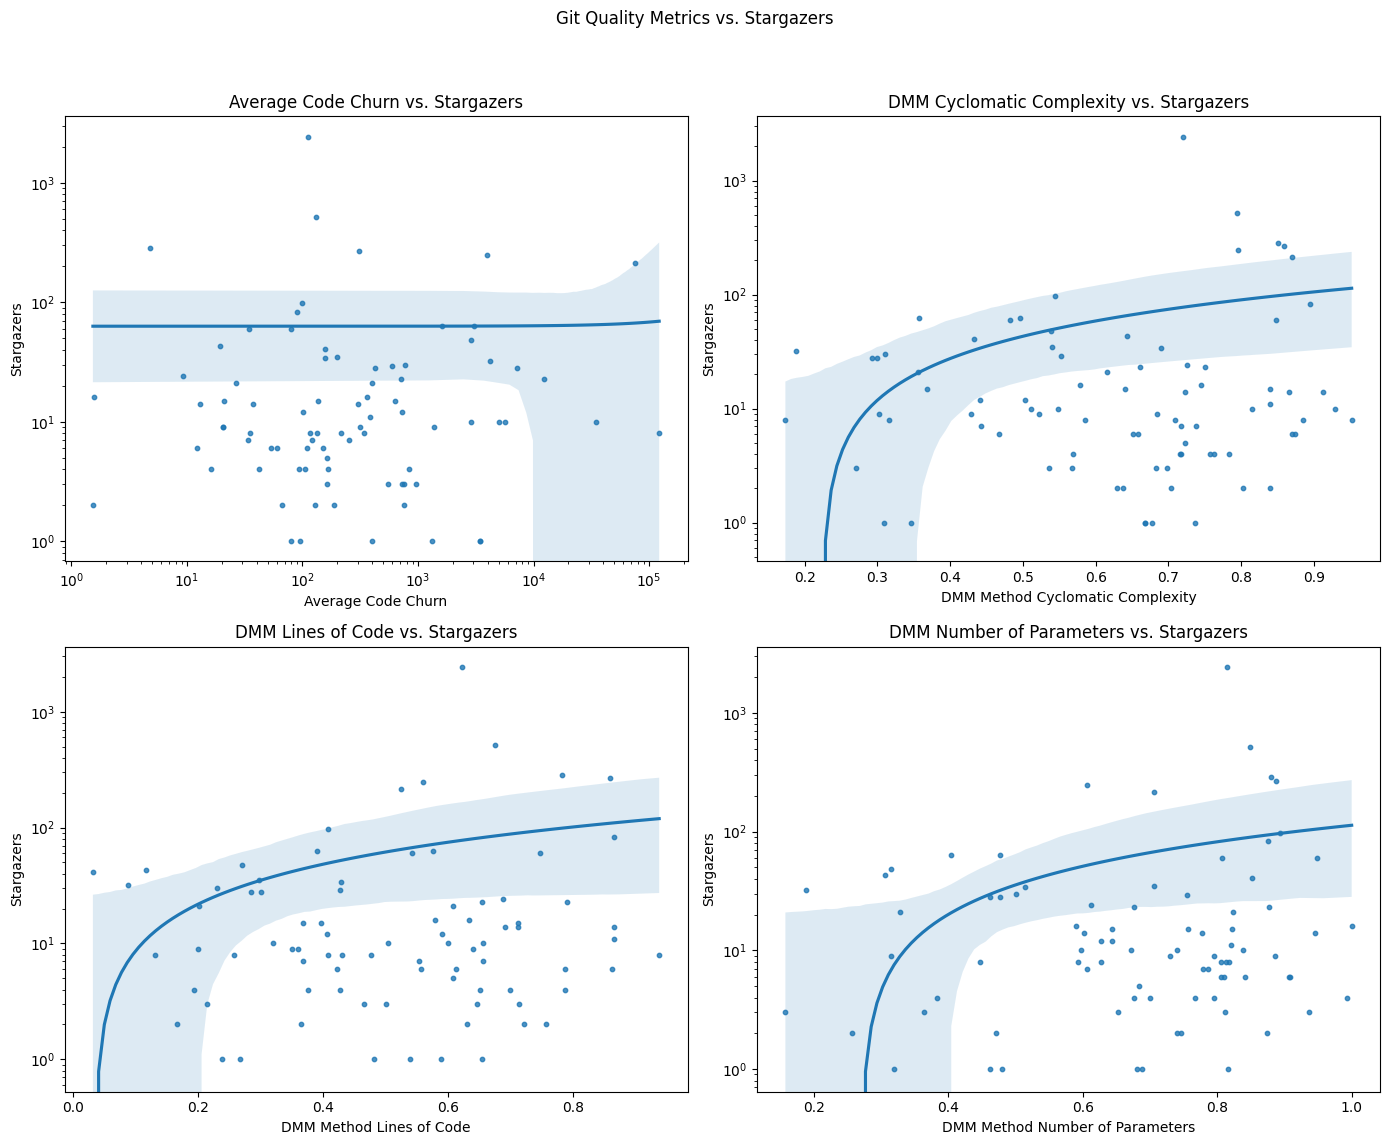

,average_code_churn_avg,average_dmm_method_cyclomatic_complexity,average_dmm_method_lines_of_code,average_dmm_method_number_of_parameters,stargazerCount
average_code_churn_avg,1.000000,-0.178144,-0.190913,0.064087,0.003045
average_dmm_method_cyclomatic_complexity,-0.178144,1.000000,0.769262,0.390583,0.109222
average_dmm_method_lines_of_code,-0.190913,0.769262,1.000000,0.510450,0.102442
average_dmm_method_number_of_parameters,0.064087,0.390583,0.510450,1.000000,0.112407
stargazerCount,0.003045,0.109222,0.102442,0.112407,1.000000


In [6]:
# Flat search, no per-commit data.

avg_churn_dmm = git_df[['repo', 'average_code_churn_avg', 'average_dmm_method_cyclomatic_complexity', 'average_dmm_method_lines_of_code', 'average_dmm_method_number_of_parameters']]


# Lower removes repos with no start, upper does not.
# avg_churn_dmm_star = pd.merge(avg_churn_dmm, metadata_df[['repo', 'stargazerCount']], on='repo')
avg_churn_dmm_star = pd.merge(avg_churn_dmm, metadata_df[['repo', 'stargazerCount']], on='repo').query('stargazerCount > 0')

correlation_matrix = avg_churn_dmm_star.drop('repo', axis=1).corr()

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Git Quality Metrics vs. Stargazers')

# Average Code Churn vs. Stargazers
sns.regplot(ax=axes[0, 0], data=avg_churn_dmm_star, x='average_code_churn_avg', y='stargazerCount', scatter_kws={'s':10})
# sns.scatterplot(ax=axes[0, 0], data=avg_churn_dmm_star, x='average_code_churn_avg', y='stargazerCount')
axes[0, 0].set_title('Average Code Churn vs. Stargazers')
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
axes[0, 0].set_xlabel('Average Code Churn')
axes[0, 0].set_ylabel('Stargazers')

# DMM Cyclomatic Complexity vs. Stargazers
sns.regplot(ax=axes[0, 1], data=avg_churn_dmm_star, x='average_dmm_method_cyclomatic_complexity', y='stargazerCount', scatter_kws={'s':10})
# sns.scatterplot(ax=axes[0, 1], data=avg_churn_dmm_star, x='average_dmm_method_cyclomatic_complexity', y='stargazerCount')
axes[0, 1].set_title('DMM Cyclomatic Complexity vs. Stargazers')
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('DMM Method Cyclomatic Complexity')
axes[0, 1].set_ylabel('Stargazers')

# DMM Lines of Code vs. Stargazers
sns.regplot(ax=axes[1, 0], data=avg_churn_dmm_star, x='average_dmm_method_lines_of_code', y='stargazerCount', scatter_kws={'s':10})
# sns.scatterplot(ax=axes[1, 0], data=avg_churn_dmm_star, x='average_dmm_method_lines_of_code', y='stargazerCount')
axes[1, 0].set_title('DMM Lines of Code vs. Stargazers')
axes[1, 0].set_yscale('log')
axes[1, 0].set_xlabel('DMM Method Lines of Code')
axes[1, 0].set_ylabel('Stargazers')

# DMM Number of Parameters vs. Stargazers
sns.regplot(ax=axes[1, 1], data=avg_churn_dmm_star, x='average_dmm_method_number_of_parameters', y='stargazerCount', scatter_kws={'s':10})
# sns.scatterplot(ax=axes[1, 1], data=avg_churn_dmm_star, x='average_dmm_method_number_of_parameters', y='stargazerCount')
axes[1, 1].set_title('DMM Number of Parameters vs. Stargazers')
axes[1, 1].set_xlabel('DMM Method Number of Parameters')
axes[1, 1].set_yscale('log')
axes[1, 1].set_ylabel('Stargazers')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

correlation_matrix

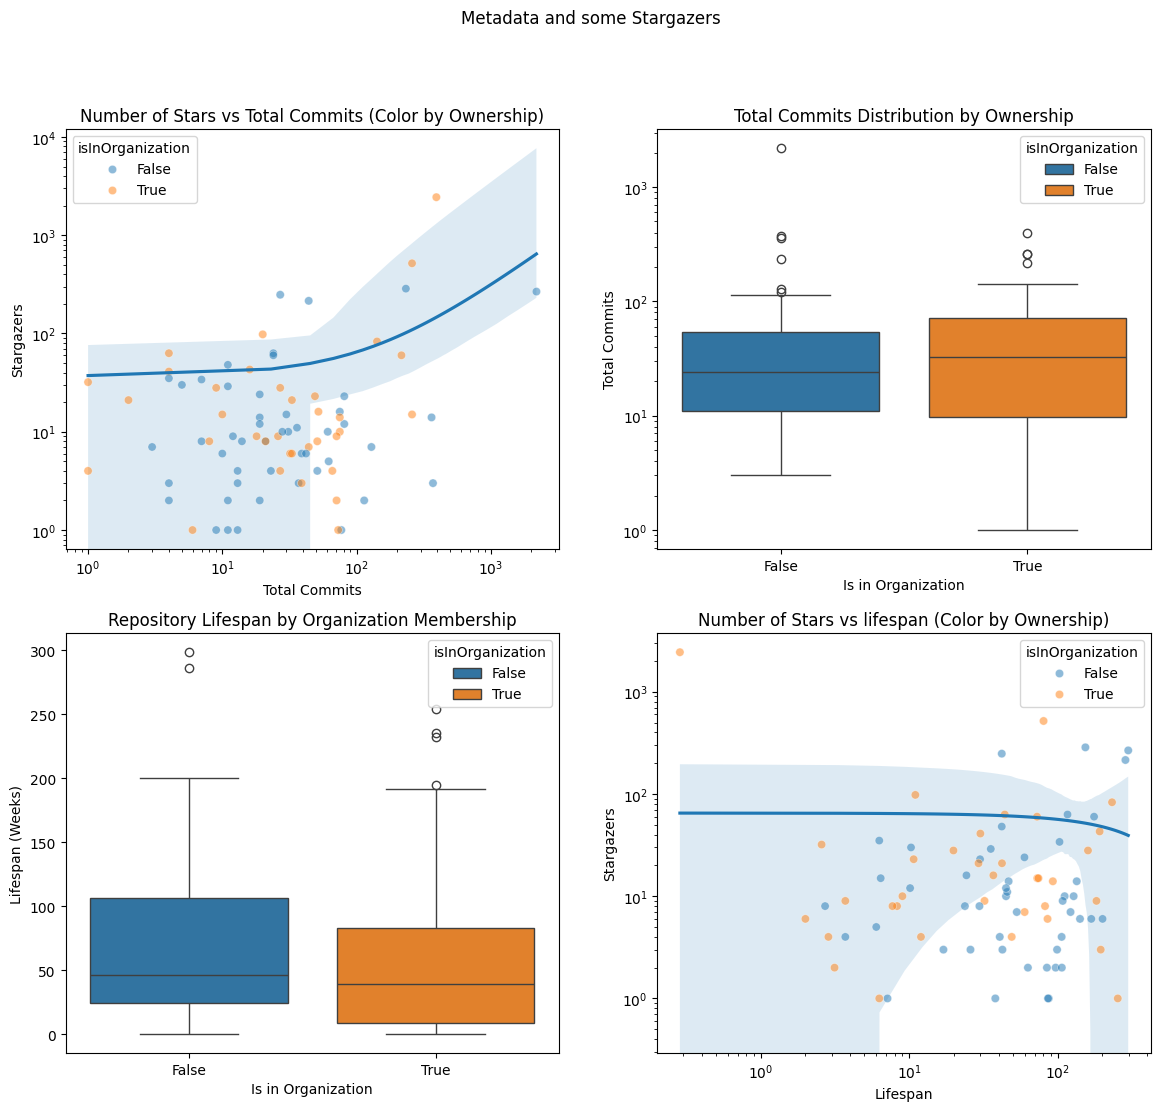

,count,mean,median,std,max,min,var,sem,skew,sum
isInOrganization,,,,,,,,,,
False,53,30.037736,8.0,66.547254,286,0,4428.537010,9.140968,3.132422,1592
True,37,99.891892,14.0,404.069011,2438,0,163271.765766,66.428536,5.712546,3696


,count,mean,median,std,max,min,var,sem,skew,sum
isInOrganization,,,,,,,,,,
False,53,90.320755,24.0,303.045425,2187,3,91836.529753,41.626491,6.640331,4787
True,36,62.083333,32.5,87.167286,393,1,7598.135714,14.527881,2.430252,2235


,count,mean,median,std,max,min,var,sem,skew,sum
isInOrganization,,,,,,,,,,
False,53,72.582210,46.714286,67.339768,298.428571,0.285714,4534.644309,9.249828,1.487672,3846.857143
True,36,67.579365,39.500000,76.121416,253.714286,0.285714,5794.469906,12.686903,1.271982,2432.857143


,repo,isInOrganization,stargazerCount,total_commits,lifespan_weeks
0,AChecker,True,28,9,19.857143
1,AidUI,True,15,259,72.857143
2,CMI-Finder,True,2,71,3.142857
3,CTRAS,False,2,4,96.857143
4,Chronos,True,9,26,32.142857


In [9]:
merged_metadata_git = pd.merge(metadata_df[['repo', 'isInOrganization', 'stargazerCount']], git_df[['repo', 'total_commits']], on='repo', how='inner')


fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Metadata and some Stargazers')

sns.regplot(ax=axes[0, 0], data=merged_metadata_git, x="total_commits", y="stargazerCount", fit_reg=True, scatter=False)
sns.scatterplot(ax=axes[0, 0], data=merged_metadata_git, x="total_commits", y="stargazerCount", hue="isInOrganization", alpha=0.5)
axes[0, 0].set_title("Number of Stars vs Total Commits (Color by Ownership)")
axes[0, 0].set_xlabel("Total Commits")
axes[0, 0].set_ylabel("Stargazers")
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")

# Boxplot for Total Commits segmented by isInOrganization
sns.boxplot(ax=axes[0, 1], x="isInOrganization", y="total_commits", data=merged_metadata_git, hue='isInOrganization')
axes[0, 1].set_title("Total Commits Distribution by Ownership")
axes[0, 1].set_xlabel("Is in Organization")
axes[0, 1].set_ylabel("Total Commits")
axes[0, 1].set_yscale("log")

merged_metadata_git['lifespan_weeks'] = (metadata_df['pushedAt'] - metadata_df['createdAt']).dt.days / 7
sns.boxplot(ax=axes[1, 0], x='isInOrganization', y='lifespan_weeks', data=merged_metadata_git, hue='isInOrganization')
axes[1, 0].set_title('Repository Lifespan by Organization Membership')
axes[1, 0].set_xlabel('Is in Organization')
axes[1, 0].set_ylabel('Lifespan (Weeks)')

sns.regplot(ax=axes[1, 1], data=merged_metadata_git, x="lifespan_weeks", y="stargazerCount", fit_reg=True, scatter=False)
sns.scatterplot(ax=axes[1, 1], data=merged_metadata_git, x="lifespan_weeks", y="stargazerCount", hue="isInOrganization", alpha=0.5)
axes[1, 1].set_title("Number of Stars vs lifespan (Color by Ownership)")
axes[1, 1].set_xlabel("Lifespan")
axes[1, 1].set_ylabel("Stargazers")
axes[1, 1].set_xscale("log")
axes[1, 1].set_yscale("log")

plt.show()
stars_by_ownership = metadata_df.groupby('isInOrganization')['stargazerCount'].agg(['count', 'mean', 'median', 'std', 'max', 'min', 'var', 'sem', 'skew', 'sum'])
display(HTML('<h2>Stargazers by Ownership</h2>'))
display(stars_by_ownership)
commits_by_ownership = merged_metadata_git.groupby('isInOrganization')['total_commits'].agg(['count', 'mean', 'median', 'std', 'max', 'min', 'var', 'sem', 'skew', 'sum'])
display(HTML('<h2>Commits by Ownership</h2>'))
display(commits_by_ownership)
lifespan_by_ownershit = merged_metadata_git.groupby('isInOrganization')['lifespan_weeks'].agg(['count', 'mean', 'median', 'std', 'max', 'min', 'var', 'sem', 'skew', 'sum'])
display(HTML('<h2>Lifespan by Ownership</h2>'))
display(lifespan_by_ownershit)
display(merged_metadata_git.head())

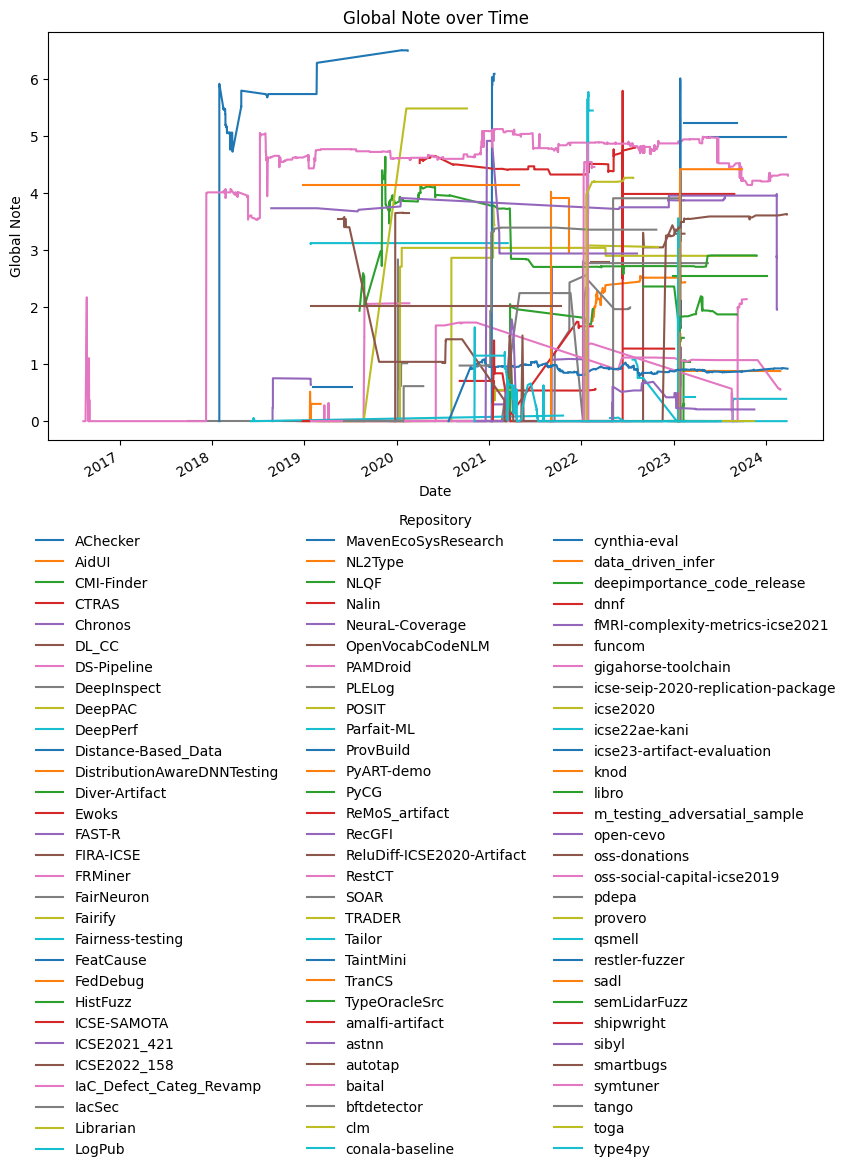

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))

for repo, group in lint_df.groupby('repo'):
    group.plot(x='date', y='global_note', ax=ax, label=repo)

plt.xlabel('Date')
plt.ylabel('Global Note')
plt.title('Global Note over Time')

# Put legend below
plt.legend(title='Repository', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

plt.show()

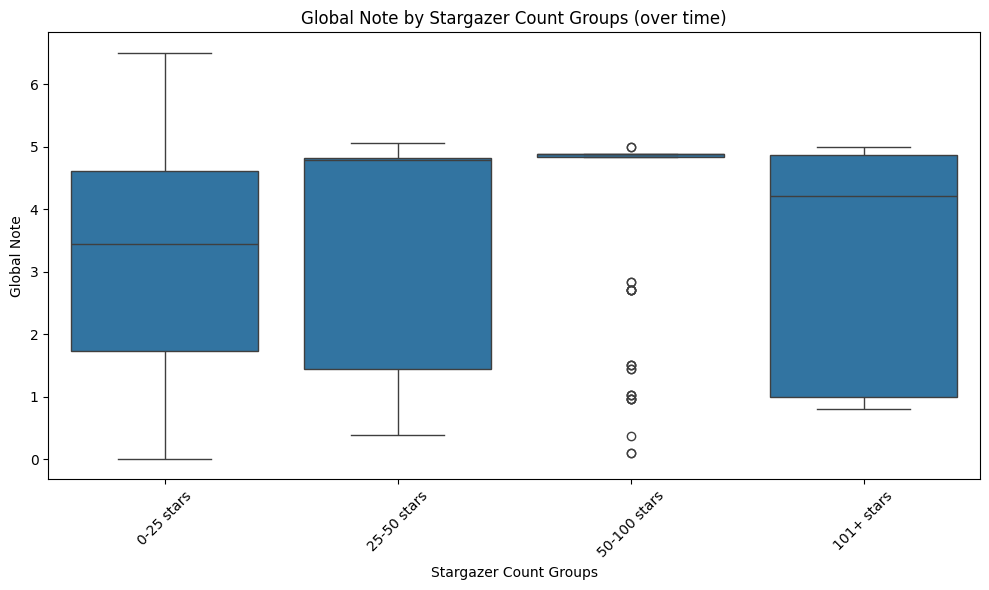

,repo,date,commit_hash,info,refactor,convention,warning,error,fatal,global_note,...,W9006.missing-raises-doc,W9008.redundant-returns-doc,W9015.missing-param-doc,W9016.missing-type-doc,W9017.differing-param-doc,W9018.differing-type-doc,W9019.useless-param-doc,W9021.missing-any-param-doc,stargazers,stargazer_group
0,gigahorse-toolchain,2016-08-23 16:00:24+00:00,ebba4008897a2892a633f271a63f9ff1e343607b,0,25,24,150,2,0,2.172285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0-25 stars
1,gigahorse-toolchain,2016-08-23 16:47:56+00:00,6817687e30695331effd571671758021f7330553,0,28,33,171,3,0,1.598639,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0-25 stars
2,gigahorse-toolchain,2016-08-24 02:53:38+00:00,72b02fa5c0d654ff6443534321d058302a56cab4,0,36,34,216,2,0,1.164179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0-25 stars
3,gigahorse-toolchain,2016-08-24 03:29:26+00:00,1d47f472dfd98e6fec34b5b01b6db4593fe8c590,0,36,36,217,2,0,1.074627,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0-25 stars
4,gigahorse-toolchain,2016-08-26 01:19:20+00:00,77cbc1f516146bf447693173c551126e13488823,0,34,37,210,2,0,1.100917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0-25 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4581,smartbugs,2024-03-24 19:13:01+00:00,7871308523fcd025d24224f08213b60173bcdb64,0,846,448,377,35,0,3.625691,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,518.0,101+ stars
4582,restler-fuzzer,2024-03-26 20:34:58+00:00,e2a887647a7b828b13a2f5f095cf05a28e0b26d9,0,3428,2079,2333,1004,0,0.920003,...,NaN,10596.0,4258.0,5108.0,1820.0,1898.0,NaN,NaN,2435.0,101+ stars
4583,gigahorse-toolchain,2024-03-28 10:52:34+00:00,4a7615a4e5ac9d8f0f571dd5c3ad8f1462abcd1f,0,275,257,297,4,0,4.324866,...,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,267.0,101+ stars
4584,gigahorse-toolchain,2024-03-28 11:00:28+00:00,231f02c9cab29ec660e8a5d0d006868795180888,0,275,257,297,4,0,4.324866,...,NaN,NaN,NaN,12.0,12.0,NaN,NaN,NaN,267.0,101+ stars


,info,refactor,convention,warning,error,fatal,global_note,avg_mccabe_complexity,percent_duplicated_lines,nb_duplicated_lines,...,W6001.deprecated-typing-alias,W9006.missing-raises-doc,W9008.redundant-returns-doc,W9015.missing-param-doc,W9016.missing-type-doc,W9017.differing-param-doc,W9018.differing-type-doc,W9019.useless-param-doc,W9021.missing-any-param-doc,stargazers
count,4586.000000,4586.000000,4586.000000,4586.000000,4586.000000,4586.0,4586.000000,4586.000000,4586.0,4586.0,...,2585.000000,2.00000,1038.000000,2597.000000,3029.000000,2260.000000,461.000000,0.0,110.000000,4456.000000
mean,0.027039,649.543829,528.080462,381.496947,114.085696,0.0,3.228895,5.059528,0.0,0.0,...,449.981431,154.00000,2752.314066,432.057759,481.794652,213.078761,935.882863,NaN,86.800000,150.057226
std,1.042044,833.364382,623.387929,508.756924,228.327542,0.0,1.689792,1.248295,0.0,0.0,...,498.218743,19.79899,3498.141880,950.916910,1095.795191,422.008649,544.651236,NaN,63.290331,392.701082
min,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.005133,2.500000,0.0,0.0,...,2.000000,140.00000,2.000000,2.000000,2.000000,2.000000,18.000000,NaN,14.000000,0.000000
25%,0.000000,157.000000,179.000000,127.000000,3.000000,0.0,1.550621,4.340426,0.0,0.0,...,72.000000,147.00000,20.000000,4.000000,8.000000,6.000000,350.000000,NaN,38.000000,0.000000
50%,0.000000,239.000000,257.000000,202.000000,21.000000,0.0,3.834910,5.068182,0.0,0.0,...,404.000000,154.00000,80.000000,6.000000,12.000000,10.000000,868.000000,NaN,63.000000,1.000000
75%,0.000000,820.000000,738.000000,364.000000,98.000000,0.0,4.720639,5.435140,0.0,0.0,...,578.000000,161.00000,5414.500000,250.000000,264.000000,160.500000,1412.000000,NaN,127.000000,123.000000
max,57.000000,5652.000000,4450.000000,3010.000000,1004.000000,0.0,6.503193,15.520000,0.0,0.0,...,5620.000000,168.00000,11190.000000,4554.000000,5642.000000,1938.000000,2084.000000,NaN,230.000000,2435.000000


,stargazer_group,mean,std,count
0,0-25 stars,3.113509,1.655527,2987
1,25-50 stars,3.659480,1.696473,172
2,50-100 stars,4.068100,1.509530,90
3,101+ stars,3.399043,1.670116,1207


,global_note,stargazers
global_note,1.000000,-0.305274
stargazers,-0.305274,1.000000


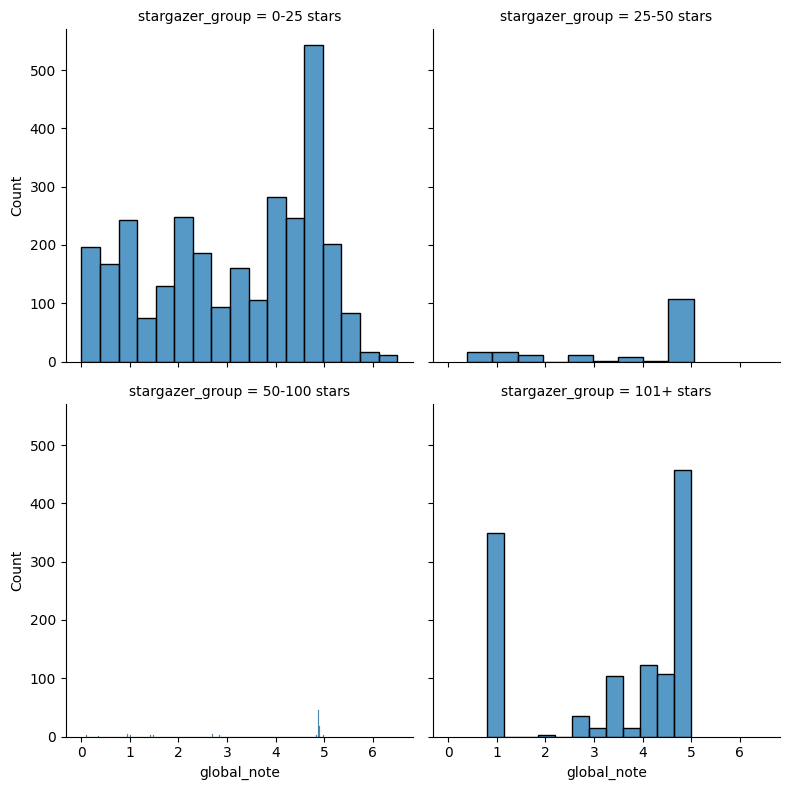

In [13]:
stargazers_long = stargazers_df.melt(id_vars=['date'], var_name='repo', value_name='stargazers')
stargazers_long['stargazers'] = pd.to_numeric(stargazers_long['stargazers'], errors='coerce')

# Ensure that they are sorted by date
# lint_df_sorted = lint_df.sort_values(by='date') # Display global note LTE 0
lint_df_sorted = lint_df.query('global_note > 0').sort_values(by='date') # Remove global note LTE 0
lint_df_sorted.reset_index()
stargazers_long_sorted = stargazers_long.sort_values(by='date')

# Perform the 'as of' merge
merged_global_star_df = pd.merge_asof(
    left=lint_df_sorted,
    right=stargazers_long_sorted,
    on='date',
    by='repo',
    direction='forward'  # Look forward from the commit date towards the next stargazer count 
)

bins = [0, 25, 50, 100, float('inf')]
labels = ['0-25 stars', '25-50 stars', '50-100 stars', '101+ stars']

# Categorize 'stargazers' into the defined bins
merged_global_star_df['stargazer_group'] = pd.cut(merged_global_star_df['stargazers'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.boxplot(x='stargazer_group', y='global_note', data=merged_global_star_df)

plt.title('Global Note by Stargazer Count Groups (over time)')
plt.xlabel('Stargazer Count Groups')
plt.ylabel('Global Note')
plt.xticks(rotation=45)  # Improve label readability if necessary
plt.tight_layout()  # Adjust layout to make room for the label
plt.savefig('img/global_note_stargazer_boxplot.svg')
plt.show()

display(HTML('<h3>Merged Global Note and Stargazers Overview</h3>'))
display(merged_global_star_df)
display(HTML('<h3>Descriptive Statistics of Global Note and Stargazers</h3>'))
display(merged_global_star_df.describe())

display(HTML('<h3>Group Summary by Stargazer Group</h3>'))
group_summary = merged_global_star_df.groupby('stargazer_group', observed=True)['global_note'].agg(['mean', 'std', 'count']).reset_index()
display(group_summary)

display(HTML('<h3>Correlation Analysis</h3>'))
correlation = merged_global_star_df[['global_note', 'stargazers']].corr()
display(correlation)

g = sns.FacetGrid(merged_global_star_df, col="stargazer_group", col_wrap=2, height=4)
g.map(sns.histplot, "global_note")
plt.show()


0          1
1          2
2          3
3          4
4          5
        ... 
5273    5275
5274    5276
5275    5277
5276    5278
5277    5279
Length: 5278, dtype: int64

,date,total_stars
0,2018-06-30 00:00:00+00:00,17
1,2018-07-31 00:00:00+00:00,20
2,2018-08-31 00:00:00+00:00,21
3,2018-09-30 00:00:00+00:00,23
4,2018-10-31 00:00:00+00:00,25
...,...,...
65,2023-11-30 00:00:00+00:00,4952
66,2023-12-31 00:00:00+00:00,5024
67,2024-01-31 00:00:00+00:00,5106
68,2024-02-29 00:00:00+00:00,5180


,date,global_note
22,2018-06-30 00:00:00+00:00,1.187910
23,2018-07-31 00:00:00+00:00,2.533223
24,2018-08-31 00:00:00+00:00,2.913028
25,2018-09-30 00:00:00+00:00,4.622723
26,2018-10-31 00:00:00+00:00,3.371712
...,...,...
87,2023-11-30 00:00:00+00:00,3.398493
88,2023-12-31 00:00:00+00:00,4.122812
89,2024-01-31 00:00:00+00:00,4.152140
90,2024-02-29 00:00:00+00:00,2.894672


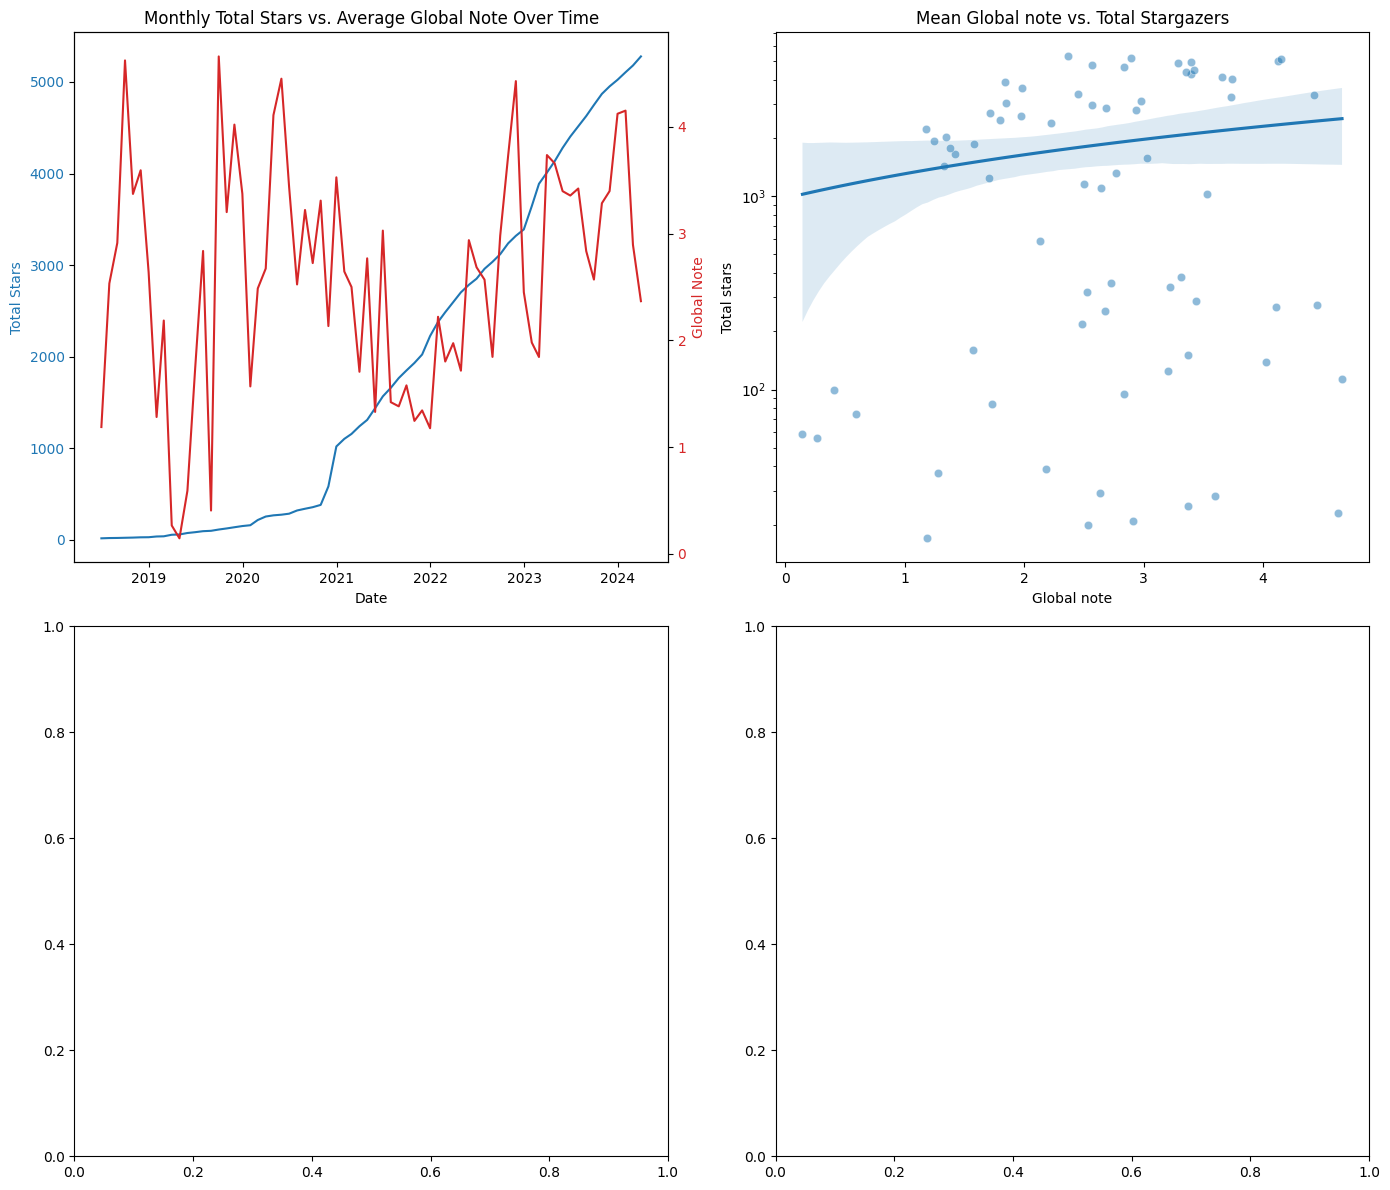

,index,date,global_note,total_stars
0,0,2018-06-30 00:00:00+00:00,1.187910,17
1,1,2018-07-31 00:00:00+00:00,2.533223,20
2,2,2018-08-31 00:00:00+00:00,2.913028,21
3,3,2018-09-30 00:00:00+00:00,4.622723,23
4,4,2018-10-31 00:00:00+00:00,3.371712,25
...,...,...,...,...
65,65,2023-11-30 00:00:00+00:00,3.398493,4952
66,66,2023-12-31 00:00:00+00:00,4.122812,5024
67,67,2024-01-31 00:00:00+00:00,4.152140,5106
68,68,2024-02-29 00:00:00+00:00,2.894672,5180


,global_note,total_stars
global_note,1.000000,0.197651
total_stars,0.197651,1.000000


In [96]:
# If sum() -> Getting the sum of ALL stars for each row in the CSV
# If mean() -> Getting the mean of ALL stars for each row in the CSV
stargazers_total = stargazers_df.drop('date', axis=1).sum(axis=1)
display(stargazers_total)

# Using sum to get total
stargazers_total_df = pd.DataFrame({
    'date': stargazers_df['date'],
    'total_stars': stargazers_total
}).groupby(pd.Grouper(key='date', freq='ME')).max().reset_index()

# Getting the first date available in stargazers in order to filter out lint data that are not directly related to a stargazer date 
start_date = stargazers_total_df['date'].min()


# Using mean, could change to sum to get total
lint_global_note_df = lint_df.groupby(pd.Grouper(key='date', freq='ME'))['global_note'].mean().reset_index()
# Filtering out lint data that are outside the stargazer date frame
lint_global_note_df = lint_global_note_df[(lint_global_note_df['date'] >= start_date)]
display(stargazers_total_df)
display(lint_global_note_df)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
ax1 = axes[0, 0]

# Plotting total stars on the primary y-axis
color = 'tab:blue'
ax1.set_title('Monthly Total Stars vs. Average Global Note Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Stars', color=color)
ax1.plot(stargazers_total_df['date'], stargazers_total_df['total_stars'], color=color, label='Total Stars')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a secondary y-axis for global note
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Global Note', color=color)
ax2.plot(lint_global_note_df['date'], lint_global_note_df['global_note'], color=color, label='Global Note')
ax2.tick_params(axis='y', labelcolor=color)

merged_global_star_timeline_df = pd.merge_asof(
    left=lint_global_note_df,
    right=stargazers_total_df,
    on='date',
    direction='forward',  # Look forward from the commit date towards the next stargazer count
    tolerance=pd.Timedelta('14 days')
).dropna(subset=['total_stars']).reset_index()

sns.regplot(ax=axes[0, 1], data=merged_global_star_timeline_df, x="global_note", y="total_stars", fit_reg=True, scatter=False)
sns.scatterplot(ax=axes[0, 1], data=merged_global_star_timeline_df, x="global_note", y="total_stars", alpha=0.5)
axes[0, 1].set_title("Mean Global note vs. Total Stargazers")
axes[0, 1].set_xlabel("Global note")
axes[0, 1].set_ylabel("Total stars")
axes[0, 1].set_xscale("linear")
axes[0, 1].set_yscale("log")

fig.tight_layout()
plt.show()
display(HTML('<h3>Merged Global Note and Stargazers Timelines</h3>'))
display(merged_global_star_timeline_df)
merged_global_star_timeline_df.to_csv('merged_global_star.csv')
display(HTML('<h3>Merged Global Note and Stargazers Timeline Correlation Test, without dates</h3>'))
display(merged_global_star_timeline_df.drop('date', axis=1).drop('index', axis=1).corr())